<a href="https://colab.research.google.com/github/Azlaan1999/Dog-v-s-Cat-Classifier/blob/main/Dog_vs_Cat_classifier_Using_CNN_and_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generator which divides the data into batches for processing large dataset into batches
train_set=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size= (256,256)
)
validation_set=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size= (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_set= train_set.map(process)
validation_set= validation_set.map(process)

In [8]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
history=model.fit(train_set,epochs=10,validation_data=validation_set)

Epoch 1/10
625/625 [==============================] - 77s 106ms/step - loss: 1.3336 - accuracy: 0.5952 - val_loss: 0.5909 - val_accuracy: 0.6802
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5556 - accuracy: 0.7171 - val_loss: 0.5508 - val_accuracy: 0.7196
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4765 - accuracy: 0.7739 - val_loss: 0.4500 - val_accuracy: 0.7816
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4147 - accuracy: 0.8164 - val_loss: 0.4785 - val_accuracy: 0.7660
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3409 - accuracy: 0.8483 - val_loss: 0.4525 - val_accuracy: 0.7956
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2634 - accuracy: 0.8899 - val_loss: 0.5158 - val_accuracy: 0.7810
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1846 - accuracy: 0.9262 - val_loss: 0.4804 - val_ac

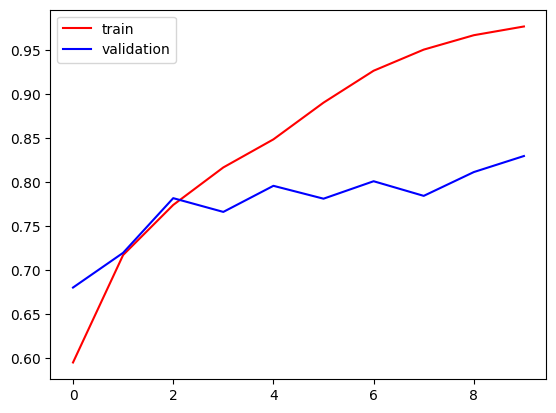

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


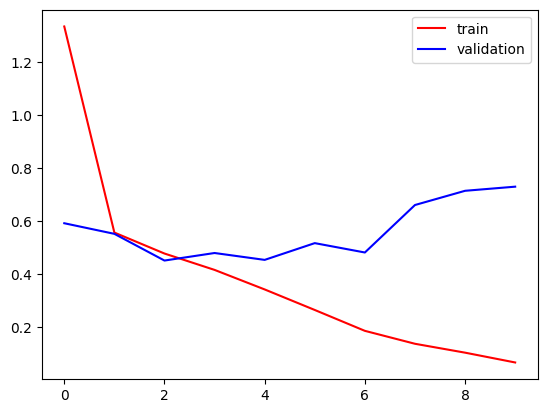

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
# way to reduce over fitting
# Dropout
#Batch Norm

In [15]:
import cv2
import numpy

In [16]:
test_img = cv2.imread("/content/GettyImages-936176546.jpg")

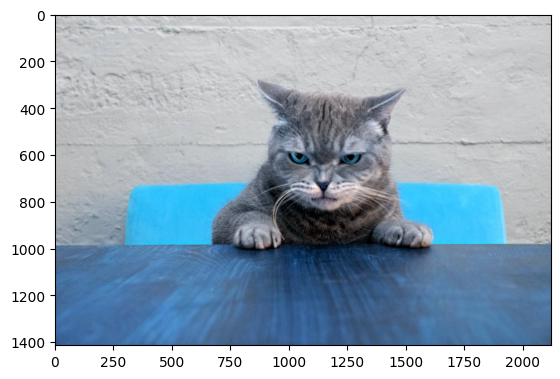

In [17]:
plt.imshow(test_img)
plt.show()

In [18]:
test_img.shape

(1414, 2121, 3)

In [19]:
test_img=cv2.resize(test_img, (256,256))

In [20]:
test_input = test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input) #predicted wrong

1/1 [==============================] - 0s 402ms/step


array([[1.]], dtype=float32)

In [26]:
test_img = cv2.imread("/content/wolf-8199785_640.jpg")

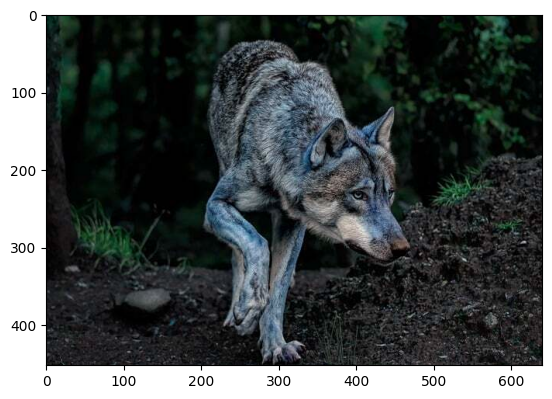

In [27]:
plt.imshow(test_img)
plt.show()

In [28]:
test_img.shape

(452, 640, 3)

In [29]:
test_img=cv2.resize(test_img, (256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input) #predicted correct i.e 1 for dog and 0 for a cat

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)

Using Transfer Learning
1. Feature extraction


In [33]:
from keras.applications.vgg16 import VGG16

In [34]:
conv_base = VGG16(
    weights= 'imagenet', # fetching the weights that are assigned in VGG16 model
    include_top = False,  # excluding ANN part
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [36]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
conv_base.trainable= False #not to update weights of convolution part while backpropogation

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [40]:
# generator which divides the data into batches for processing large dataset into batches
train_set=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size= (150,150)
)
validation_set=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size= (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [41]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_set= train_set.map(process)
validation_set= validation_set.map(process)

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history= model.fit(train_set,epochs=10,validation_data=validation_set)

Epoch 1/10
625/625 [==============================] - 69s 102ms/step - loss: 0.2645 - accuracy: 0.8876 - val_loss: 0.2119 - val_accuracy: 0.9084
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1857 - accuracy: 0.9229 - val_loss: 0.2103 - val_accuracy: 0.9138
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1581 - accuracy: 0.9359 - val_loss: 0.2037 - val_accuracy: 0.9164
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1292 - accuracy: 0.9486 - val_loss: 0.2249 - val_accuracy: 0.9116
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1039 - accuracy: 0.9583 - val_loss: 0.2472 - val_accuracy: 0.9122
Epoch 6/10
625/625 [==============================] - 52s 84ms/step - loss: 0.0780 - accuracy: 0.9699 - val_loss: 0.2653 - val_accuracy: 0.9116
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0646 - accuracy: 0.9767 - val_loss: 0.2875 - val_accur

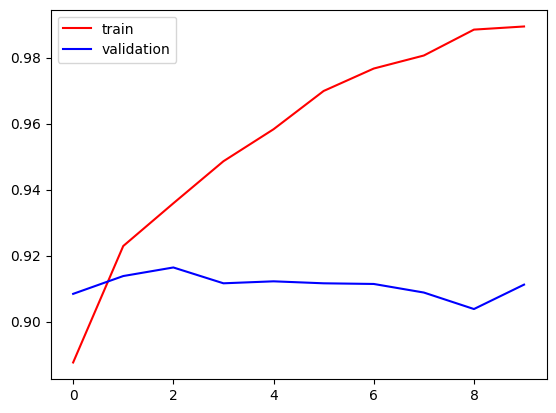

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

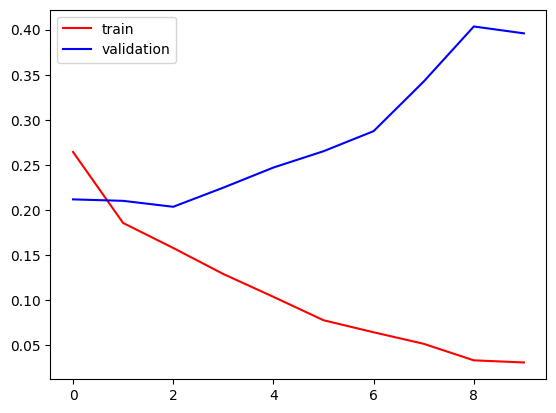

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [46]:
test_img = cv2.imread("/content/GettyImages-936176546.jpg")

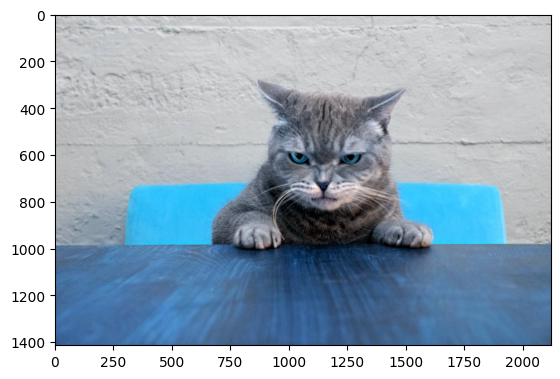

In [47]:
plt.imshow(test_img)
plt.show()

In [48]:
test_img.shape

(1414, 2121, 3)

In [49]:
test_img=cv2.resize(test_img, (150,150))

In [50]:
test_input = test_img.reshape((1,150,150,3))

In [51]:
model.predict(test_input) #predicted corect

1/1 [==============================] - 1s 978ms/step


array([[0.]], dtype=float32)

In [52]:
test_img = cv2.imread("/content/wolf-8199785_640.jpg")

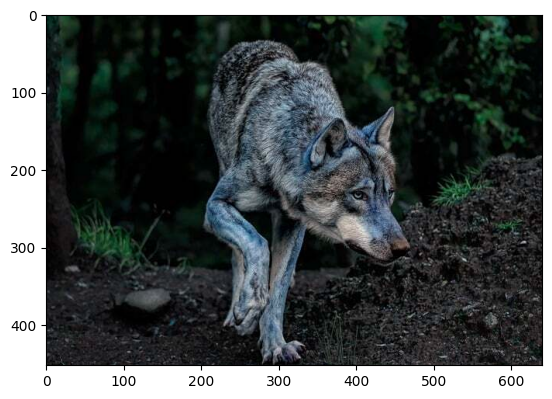

In [53]:
plt.imshow(test_img)
plt.show()

In [54]:
test_img.shape

(452, 640, 3)

In [55]:
test_img=cv2.resize(test_img, (150,150))

In [56]:
test_input = test_img.reshape((1,150,150,3))

In [57]:
model.predict(test_input) # predicted correct

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

2. Fine tuning(Transfer learning)

In [58]:
conv_base.trainable = True

set_trainable= False

for layer in conv_base.layers:
  if layer.name =='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable= False
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [59]:
print(layer.name,layer.trainable)

block5_pool True


In [60]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [61]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [62]:
# generator which divides the data into batches for processing large dataset into batches
train_set=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size= (150,150)
)
validation_set=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size= (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [63]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_set= train_set.map(process)
validation_set= validation_set.map(process)

In [64]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-5),loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history=model.fit(train_set,epochs=10,validation_data=validation_set)

Epoch 1/10
625/625 [==============================] - 74s 115ms/step - loss: 2.1322 - accuracy: 0.8272 - val_loss: 0.1519 - val_accuracy: 0.9416
Epoch 2/10
625/625 [==============================] - 62s 98ms/step - loss: 0.1714 - accuracy: 0.9354 - val_loss: 0.1943 - val_accuracy: 0.9304
Epoch 3/10
625/625 [==============================] - 62s 98ms/step - loss: 0.1236 - accuracy: 0.9553 - val_loss: 0.1519 - val_accuracy: 0.9430
Epoch 4/10
625/625 [==============================] - 62s 98ms/step - loss: 0.0907 - accuracy: 0.9665 - val_loss: 0.2559 - val_accuracy: 0.9458
Epoch 5/10
625/625 [==============================] - 62s 99ms/step - loss: 0.0696 - accuracy: 0.9760 - val_loss: 0.2022 - val_accuracy: 0.9466
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.2519 - val_accuracy: 0.9446
Epoch 7/10
625/625 [==============================] - 62s 98ms/step - loss: 0.0473 - accuracy: 0.9870 - val_loss: 0.4865 - val_accurac

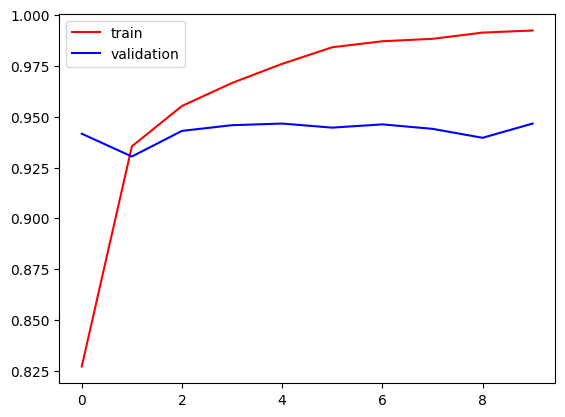

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

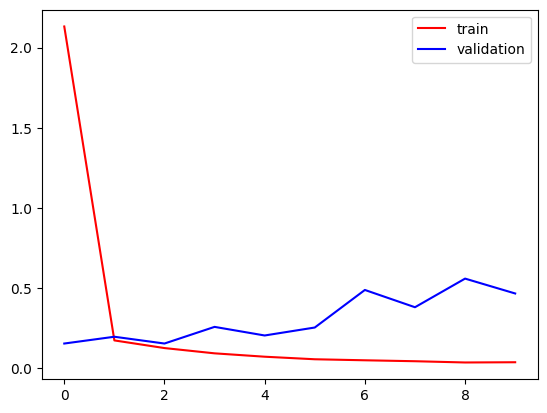

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [68]:
test_img = cv2.imread("/content/GettyImages-936176546.jpg")

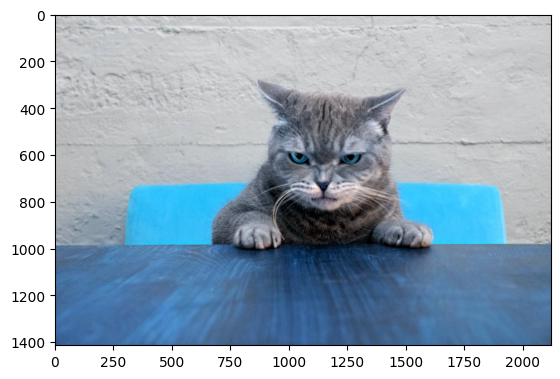

In [69]:
plt.imshow(test_img)
plt.show()

In [70]:
test_img.shape

(1414, 2121, 3)

In [71]:
test_img=cv2.resize(test_img, (150,150))

In [72]:
test_input = test_img.reshape((1,150,150,3))

In [74]:
model.predict(test_input) # predicted correct

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)